In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read data from csv file and show columns
df = pd.read_csv('/Users/macbook/DataspellProjects/DM-Project-GroupU/Datasets/nursery.csv')
df.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'final evaluation'],
      dtype='object')

In [7]:
mappings = {
    'parents': {
        'usual': 1,
        'pretentious': 2,
        'great_pret': 3
    },
    'has_nurs': {
        'proper': 1,
        'less_proper': 2,
        'improper': 3,
        'critical': 4,
        'very_crit': 5
    },
    'form': {
        'complete': 1,
        'completed': 2,
        'incomplete': 3,
        'foster': 4
    },
    'children': {
        '1': 1,
        '2': 2,
        '3': 3,
        'more': 4
    },
    'housing': {
        'convenient': 1,
        'less_conv': 2,
        'critical': 3
    },
    'finance': {
        'convenient': 1,
        'inconv': 2
    },
    'social': {
        'nonprob': 1,
        'slightly_prob': 2,
        'problematic': 3
    },
    'health': {
        'not_recom': 1,
        'recommended': 2,
        'priority': 3
    }
}

for col, mapping in mappings.items():
    df[col] = df[col].map(mapping)

In [8]:
# Check unique values in each column
for col in mappings.keys():
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'parents': [1 2 3]
Unique values in column 'has_nurs': [1 2 3 4 5]
Unique values in column 'form': [1 2 3 4]
Unique values in column 'children': [1 2 3 4]
Unique values in column 'housing': [1 2 3]
Unique values in column 'finance': [1 2]
Unique values in column 'social': [1 2 3]
Unique values in column 'health': [2 3 1]


In [9]:
df

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,1,1,1,1,1,1,1,2,recommend
1,1,1,1,1,1,1,1,3,priority
2,1,1,1,1,1,1,1,1,not_recom
3,1,1,1,1,1,1,2,2,recommend
4,1,1,1,1,1,1,2,3,priority
...,...,...,...,...,...,...,...,...,...
12955,3,5,4,4,3,2,2,3,spec_prior
12956,3,5,4,4,3,2,2,1,not_recom
12957,3,5,4,4,3,2,3,2,spec_prior
12958,3,5,4,4,3,2,3,3,spec_prior


In [10]:
# Set title for each column
df = df.set_axis(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target'], axis=1, copy=False)
df

,parents,has_nurs,form,children,housing,finance,social,health,target
0,1,1,1,1,1,1,1,2,recommend
1,1,1,1,1,1,1,1,3,priority
2,1,1,1,1,1,1,1,1,not_recom
3,1,1,1,1,1,1,2,2,recommend
4,1,1,1,1,1,1,2,3,priority
...,...,...,...,...,...,...,...,...,...
12955,3,5,4,4,3,2,2,3,spec_prior
12956,3,5,4,4,3,2,2,1,not_recom
12957,3,5,4,4,3,2,3,2,spec_prior
12958,3,5,4,4,3,2,3,3,spec_prior


In [11]:
# Check value in dataframe
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health
count,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000,12960.000000
mean,2.000000,3.000000,2.500000,2.500000,2.000000,1.500000,2.000000,2.000000
std,0.816528,1.414268,1.118077,1.118077,0.816528,0.500019,0.816528,0.816528
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,3.000000,2.500000,2.500000,2.000000,1.500000,2.000000,2.000000
75%,3.000000,4.000000,3.250000,3.250000,3.000000,2.000000,3.000000,3.000000
max,3.000000,5.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000


In [12]:
# Check if any value is null in dataframe
df.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
target      0
dtype: int64

In [13]:
# Get some information from dataset
L = len(df.index)

def print_counts(df):
    for x in df.columns:
        print(f"Column: {x}")
        for i, y in zip(df[x].value_counts().index, df[x].value_counts()):
            i = str(i)
            s = f'{i:14}{y/L:4.2f} {y:4d}'
            print(s)
        print('\n')

print_counts(df)

Column: parents
1             0.33 4320
2             0.33 4320
3             0.33 4320


Column: has_nurs
1             0.20 2592
2             0.20 2592
3             0.20 2592
4             0.20 2592
5             0.20 2592


Column: form
1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


Column: children
1             0.25 3240
2             0.25 3240
3             0.25 3240
4             0.25 3240


Column: housing
1             0.33 4320
2             0.33 4320
3             0.33 4320


Column: finance
1             0.50 6480
2             0.50 6480


Column: social
1             0.33 4320
2             0.33 4320
3             0.33 4320


Column: health
2             0.33 4320
3             0.33 4320
1             0.33 4320


Column: target
not_recom     0.33 4320
priority      0.33 4266
spec_prior    0.31 4044
very_recom    0.03  328
recommend     0.00    2




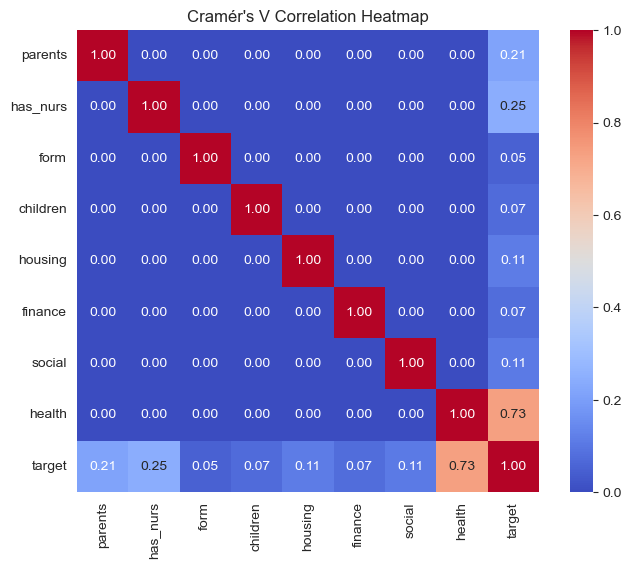

In [14]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
    rcorr = r - ((r - 1)**2)/(n - 1)
    kcorr = k - ((k - 1)**2)/(n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
# Compute Cramér's V for all categorical pairs
categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert to numeric for plotting
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Cramér's V Correlation Heatmap")
plt.show()

In [15]:
#Case1 :Make a new dataset after removing unnecessary features
columns_to_exclude = ['form', 'children','finance']
new_df = df.drop(columns=columns_to_exclude)
new_df

,parents,has_nurs,housing,social,health,target
0,1,1,1,1,2,recommend
1,1,1,1,1,3,priority
2,1,1,1,1,1,not_recom
3,1,1,1,2,2,recommend
4,1,1,1,2,3,priority
...,...,...,...,...,...,...
12955,3,5,3,2,3,spec_prior
12956,3,5,3,2,1,not_recom
12957,3,5,3,3,2,spec_prior
12958,3,5,3,3,3,spec_prior


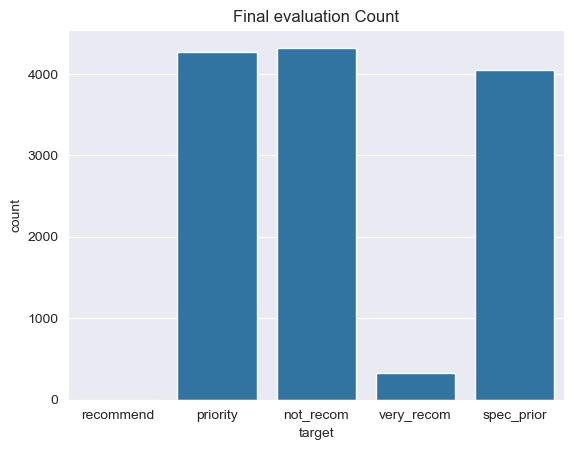

In [16]:
# Visualizing target count
sns.countplot(x='target',data=new_df)
plt.title('Final evaluation Count')
plt.show()

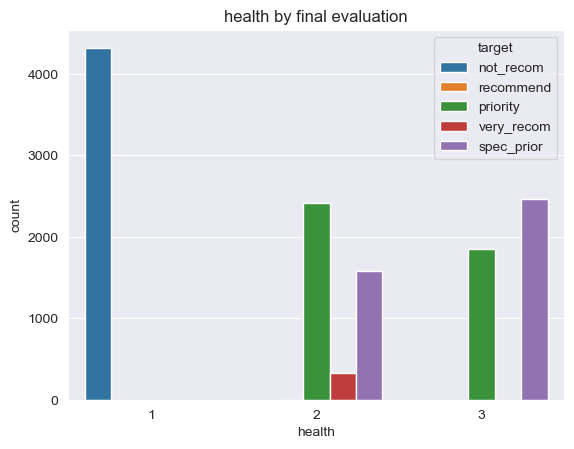

In [17]:
# Class distribution
sns.countplot(x='health', data=new_df, hue='target')
plt.title('health by final evaluation')
plt.show()

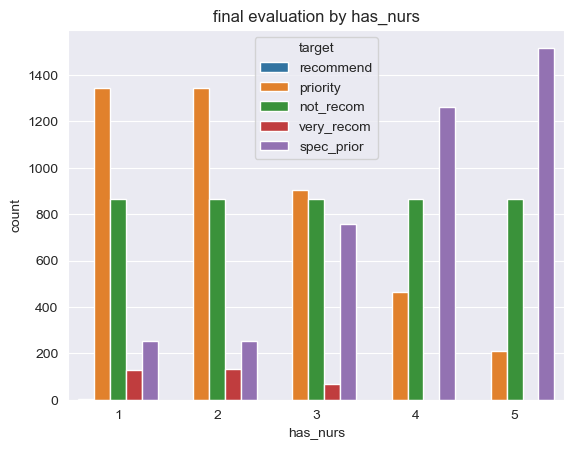

In [18]:
# final evaluation by has_nurs
sns.countplot(x='has_nurs', hue='target', data=new_df)
plt.title('final evaluation by has_nurs')
plt.show()

In [19]:
df.to_csv("nursery_after_proc_case0.csv", index=False)
df

,parents,has_nurs,form,children,housing,finance,social,health,target
0,1,1,1,1,1,1,1,2,recommend
1,1,1,1,1,1,1,1,3,priority
2,1,1,1,1,1,1,1,1,not_recom
3,1,1,1,1,1,1,2,2,recommend
4,1,1,1,1,1,1,2,3,priority
...,...,...,...,...,...,...,...,...,...
12955,3,5,4,4,3,2,2,3,spec_prior
12956,3,5,4,4,3,2,2,1,not_recom
12957,3,5,4,4,3,2,3,2,spec_prior
12958,3,5,4,4,3,2,3,3,spec_prior


In [20]:
new_df.to_csv("nursery_after_proc_case1.csv", index=False)
new_df

,parents,has_nurs,housing,social,health,target
0,1,1,1,1,2,recommend
1,1,1,1,1,3,priority
2,1,1,1,1,1,not_recom
3,1,1,1,2,2,recommend
4,1,1,1,2,3,priority
...,...,...,...,...,...,...
12955,3,5,3,2,3,spec_prior
12956,3,5,3,2,1,not_recom
12957,3,5,3,3,2,spec_prior
12958,3,5,3,3,3,spec_prior
